<img src='logo_ucm.png' width='200'/>

# <center>PROYECTO MACHINE LEARNING AIRBNB</center>

**PARTICIPANTES:**

PROYECTO MACHINE LEARNING AIRBNB
PARTICIPANTES:

BRYAM DAVID CHAMBA JARAMILLO

ALVAR YEBEL DE BLAS FERNÁNDEZ

MARÍA GARCÍA RODRIGUEZ

MANUEL GRAU ROLDÁN

ÁLVARO MARTÍN LÓPEZ

LUIS JAVIER NATES ARECHAVALETA

In [104]:
import funciones_auxiliares 
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import datetime

#Estadística
from scipy import stats
from scipy.stats import norm
import inspect

#Aprendizaje automático
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# 1. Importar los datos.

Los importamos mediante read_csv de pandas

In [165]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)

C:\Users\lolo\AppData\Local\Temp/ipykernel_13376/828998556.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)


In [166]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [167]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Tenemos tantas variables que no nos salen todas en la tabla, antes de nada arreglaremos algunas variables para poder analizarlas mejor luego.

# 2. Transformacion y eliminación de los datos.

## A) Selección de variables

Antes de eliminar nada primero veremos que variables son categoricas viendo cuánto se repiten y que tipo de variables son.

In [168]:
for i in data.columns:
    n = len(pd.unique(data[i]))
    print("No.of.unique values of '"+i+"':", n)

No.of.unique values of 'ID': 14780
No.of.unique values of 'Listing Url': 14780
No.of.unique values of 'Scrape ID': 38
No.of.unique values of 'Last Scraped': 37
No.of.unique values of 'Name': 14376
No.of.unique values of 'Summary': 13290
No.of.unique values of 'Space': 10175
No.of.unique values of 'Description': 14282
No.of.unique values of 'Experiences Offered': 5
No.of.unique values of 'Neighborhood Overview': 7913
No.of.unique values of 'Notes': 4653
No.of.unique values of 'Transit': 7840
No.of.unique values of 'Access': 7129
No.of.unique values of 'Interaction': 6586
No.of.unique values of 'House Rules': 8031
No.of.unique values of 'Thumbnail Url': 11958
No.of.unique values of 'Medium Url': 11958
No.of.unique values of 'Picture Url': 14758
No.of.unique values of 'XL Picture Url': 11958
No.of.unique values of 'Host ID': 8935
No.of.unique values of 'Host URL': 8935
No.of.unique values of 'Host Name': 3277
No.of.unique values of 'Host Since': 2117
No.of.unique values of 'Host Location'

In [169]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

La variable regresora que queremos obtener será el precio.

In [170]:
y = data['Price']

Escogemos las variables con las que nos quedamos, algunas variables las eliminamos por ser muy parecidas, otras por no aportar información del problema y otras como 'Monthly Price' por ser hasta cierto punto lo que queremos obtener.

In [171]:
data=data[['Host Since','Host Response Rate','Host Acceptance Rate',
            'Host Listings Count','Host Total Listings Count',
            'Host Verifications','Market','Property Type','Room Type',
            'Accommodates','Bathrooms','Bedrooms','Beds','Bed Type',
            'Amenities','Square Feet',
            'Cleaning Fee','Guests Included','Extra People','Minimum Nights',
            'Maximum Nights','Availability 365','Number of Reviews',
            'Review Scores Rating','License','Cancellation Policy',
             'Calculated host listings count','Reviews per Month','Geolocation',
             'Features','Latitude','Longitude']
            ]

In [172]:
data.shape

(14780, 32)

In [173]:
data.head()

,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Market,Property Type,Room Type,Accommodates,...,Number of Reviews,Review Scores Rating,License,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Latitude,Longitude
0,2016-02-11,100.0,NaN,1.0,1.0,"email,phone,reviews,kba",Austin,Loft,Entire home/apt,2,...,42,98.0,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",30.337361,-97.863277
1,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,1,80.0,HUTB-006721,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ...",41.389683,2.172625
2,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,0,NaN,HUTB-007527,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ...",41.393035,2.162173
3,2010-05-25,100.0,NaN,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Apartment,Entire home/apt,8,...,13,92.0,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re...",41.396967,2.167418
4,2016-01-12,99.0,NaN,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Apartment,Entire home/apt,5,...,0,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is...",41.388685,2.155150


Hemos quitado bastante paja, algunas variables las hemos eliminado por ser sumas de otras, por ser muy parecido a otras etc.

## B) Matriz de correlación en variables continuas.

In [174]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)

Hagamos la matriz de correlación para ver si algunas variables aportan información similar a nuestro modelo de regresión, lo que permitiría eliminar algunas variables

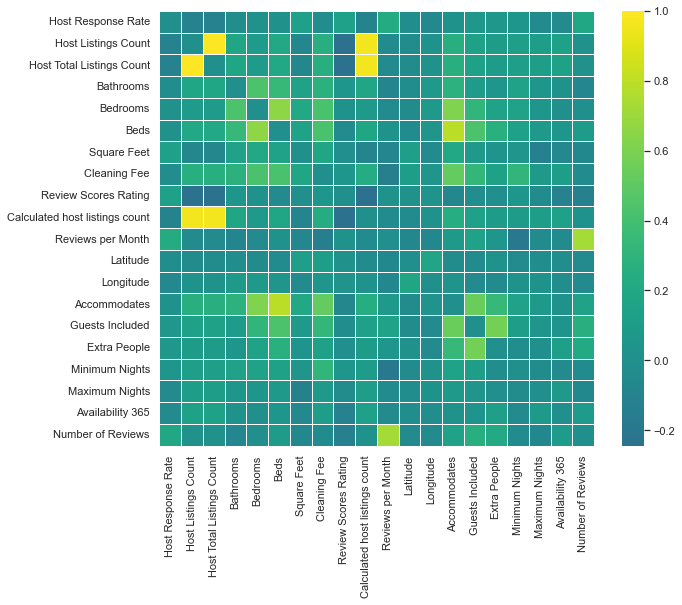

0

In [175]:
funciones_auxiliares.get_corr_matrix(dataset = data[list_var_continuous], metodo='spearman', size_figure=[10,8])

Con un simple análisis cualitativo parece claro que 3 variables (las relacionadas tienen una correlaión perfecta por lo que podemos prescindir e dos de ellas y simplificar algo el modelo

In [176]:
data = data.drop(['Host Total Listings Count', 'Host Listings Count'], axis = 1)

In [177]:
data.columns

Index(['Host Since', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Verifications', 'Market', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'License',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features', 'Latitude',
       'Longitude'],
      dtype='object')

# 3.Transformación de variables.

### 3.1. Cancellation Policy.
Utilizaremos los cuantiles para poder distibuir los valores en cuatro categorías

Póliza de cancelación

In [178]:
data['Cancellation Policy'].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

In [179]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace({'strict': 0.25, 'flexible':0.9, 'moderate': 0.5,
                                                                   'strict_new': 0.25, 'super_strict_60':0, 'super_strict_30':0,
                                                                  'moderate_new':0.5, 'flexible_new': 0.9}).astype('float')

Al estandarizar los datos con la división del X_train y X_test servirán para mejorar el algoritmo

### 3.3. Host Since.
El siguiente paso será transformar la fecha desde la que el dueño del airbnb ofrece un alojamiento en días desde esa fecha

In [180]:
fecha = pd.to_datetime(data['Host Since'])
#Creamos una variable que reste la maxima fecha de nuestra base de datos a la fecha del anfitrión 
tiempo_anfitrión = (max(fecha) - fecha).astype('timedelta64[D]')
#Sustituimos por la variable fecha para que sea más sencillo utilizarla a la hora de los modelos 
data['Host Since'] = tiempo_anfitrión
data['Host Since'] = data['Host Since'].fillna(0)

### 3.4. Amenities, Features, Host Verifications y License.

Estas variables que vienen en formato string que sin embargo se pueden transformar a una ristra de variables binarias , las transformaremos y posteriormente haremos PCA parea reducirlas.

In [181]:
def str_to_dataframe(data,column):
    datos=[]
    for i in data[column]:
        if type(i)== float:#si es np.nan creamos un diccionario vacio
            lista={}
        else:#en caso contrario creamos un diccionario con los datos
            aux =i.split(',')
            lista={}
            for j in aux:
                lista[j]=True
        datos.append(lista)#añadimos el diccionario creada a la lista
    return(pd.DataFrame(datos).fillna(False))#transformamos la list en dataframe 
    

Dado que todas las variables que nos saldrán son dicotómicas usaremos Pca para tranformar la variables(Probamos a usar clustering gerárquico con la distancia de Manhattan pero tardaba demasiado), de tal forma que obtendremos varias variables continuas.

In [182]:
def str_to_continuous(data, columns,N_components):
    '''
    El siguiente código 
    data: dataframe a usar 
    columns: columnar que se quieren transformar 
    n_components:lista con numero de componentes que se quieren obtener por fila 
    
    '''
    from sklearn.decomposition import PCA
    X_transK=pd.DataFrame()
    for i,column in enumerate(columns):
        datos=str_to_dataframe(data,column)
        if column=='Host Verifications':#Contaremos License como parte de host verification
            datos['License']=data['License'].isna()           
        pca = PCA(n_components=N_components[i])
        pca.fit(datos)
        print(pca.explained_variance_ratio_.sum())
        labels=[]
        for i in range(N_components[i]):
            labels.append(column+'_'+str(i))
        data= data.join(pd.DataFrame(pca.transform(datos),columns=labels))
    return data

Tras algunas pruebas decidimos usar 12 componentes para Amenities,
3 para  Features y 3 para Host verifications

In [183]:
columns=['Amenities','Features','Host Verifications']
N_components=[12,3,3]
data=str_to_continuous(data, columns,N_components)

0.6297993368205003
0.7710154876416939
0.6157291122884271


In [184]:
data=data.drop(['Amenities','Features','Host Verifications','License'],axis=1)

In [185]:
data

,Host Since,Host Response Rate,Host Acceptance Rate,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,421.0,100.0,NaN,Austin,Loft,Entire home/apt,2,1.0,1.0,1.0,...,-0.493866,0.241849,0.643332,0.168208,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.348083,0.016201,0.830598,0.771939,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.348083,0.016201,0.830598,0.771939,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
3,2509.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,8,2.0,3.0,4.0,...,-0.736893,0.510097,0.102545,0.048506,-0.258650,0.582044,0.767222,0.408022,0.634086,-0.754867
4,451.0,99.0,NaN,Barcelona,Apartment,Entire home/apt,5,1.0,2.0,2.0,...,0.003674,0.223349,-0.040737,-0.053632,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,1206.0,100.0,NaN,New York,Apartment,Entire home/apt,2,1.0,1.0,2.0,...,0.308834,0.157686,0.440111,0.141630,-0.441616,-0.630208,-0.066578,0.218679,-0.313825,-0.301971
14776,14.0,NaN,NaN,Paris,Bed & Breakfast,Private room,1,1.0,1.0,2.0,...,-0.063828,-0.399423,0.331525,-0.191562,0.053822,0.666518,-0.601453,-0.711725,0.004053,0.461924
14777,641.0,100.0,NaN,Paris,Apartment,Entire home/apt,5,1.0,2.0,3.0,...,-0.135152,-0.497857,-0.262361,0.785842,0.017094,-0.436794,0.798862,0.218679,-0.313825,-0.301971
14778,1479.0,100.0,80%,Denver,Apartment,Entire home/apt,4,1.0,1.0,2.0,...,-0.367483,-0.564661,-0.341370,0.785086,-0.347748,-0.583844,-0.100140,0.386172,0.660100,-0.476575


Property Type

### 3.5. Property Type

In [186]:
data['Property Type'].value_counts()

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: Property Type, dtype: int64

In [187]:
data['Property Type'].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Guesthouse': 'House',
    'Casa particular': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth House': 'House',
    'Chalet': 'House',
    'Boutique hotel': 'Other',
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',
    'Dorm': 'Other',
    'Hostel': 'Other',
    'Guest suite': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',
    'Boat': 'Other',
    'Camper/RV': 'Other'
    }, inplace=True)


In [188]:
data['Property Type'].value_counts()

Apartment    12280
House         1480
Other         1020
Name: Property Type, dtype: int64

### 3.6. Geolocalización.

Dado que Geolocalitation tiene latitud y logitud crearemos una nueva variable en la que será la multiplicacion entre latitud y longitud , de tal forma reducimos las variables y las casas que esten cerca tendrán valores similares

In [189]:
data['Geolocation']=data['Latitude']*data['Longitude']

In [190]:
data=data.drop(['Longitude','Latitude'],1)

C:\Users\lolo\AppData\Local\Temp/ipykernel_13376/3581283567.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(['Longitude','Latitude'],1)


In [191]:
list_var_discrets

['Market', 'Property Type', 'Room Type', 'Bed Type']

### 3.7 Host acceptance rate.

A pesar de ser un porcentaje Host acceptance rate esta en un formato nada agradable, lo arreglaremos 

In [192]:
lista=[]
for i in data['Host Acceptance Rate']:
    lista.append(float(str(i).replace('%','')))
data['Host Acceptance Rate']=lista

# 4. Valores missing e imputación

### 4.1. Variables Continuas.

In [193]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)
list_var_discrets = list(data.select_dtypes('object').columns)


In [194]:
data[list_var_continuous]

,Host Since,Host Response Rate,Host Acceptance Rate,Bathrooms,Bedrooms,Beds,Square Feet,Cleaning Fee,Review Scores Rating,Cancellation Policy,...,Host Verifications_0,Host Verifications_1,Host Verifications_2,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews
0,421.0,100.0,NaN,1.0,1.0,1.0,NaN,NaN,98.0,0.50,...,-0.619940,-0.101797,0.106469,2,1,0,2,1125,281,42
1,150.0,100.0,NaN,1.0,1.0,1.0,NaN,40.0,80.0,0.00,...,-0.541394,-0.128328,-0.093625,4,2,44,1,1125,309,1
2,150.0,100.0,NaN,1.0,1.0,1.0,NaN,60.0,NaN,0.00,...,-0.541394,-0.128328,-0.093625,4,2,42,1,1125,291,0
3,2509.0,100.0,NaN,2.0,3.0,4.0,NaN,79.0,92.0,0.25,...,0.408022,0.634086,-0.754867,8,2,39,2,1125,316,13
4,451.0,99.0,NaN,1.0,2.0,2.0,NaN,55.0,NaN,0.90,...,0.218679,-0.313825,-0.301971,5,1,0,2,1125,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,1206.0,100.0,NaN,1.0,1.0,2.0,NaN,60.0,95.0,0.25,...,0.218679,-0.313825,-0.301971,2,1,0,1,1125,339,30
14776,14.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,0.90,...,-0.711725,0.004053,0.461924,1,1,0,3,7,78,0
14777,641.0,100.0,NaN,1.0,2.0,3.0,NaN,40.0,94.0,0.25,...,0.218679,-0.313825,-0.301971,5,3,10,3,1125,97,17
14778,1479.0,100.0,80.0,1.0,1.0,2.0,NaN,10.0,100.0,0.50,...,0.386172,0.660100,-0.476575,4,2,10,2,7,14,1


In [216]:
lista=data[list_var_continuous].isna().sum()
var_na=[]
for i,j in enumerate(lista):
    if lista[list_var_continuous[i]]>0:
        var_na.append(list_var_continuous[i])

In [217]:
data[var_na].isna().mean()

Host Response Rate                0.128484
Host Acceptance Rate              0.997361
Square Feet                       0.959540
Review Scores Rating              0.223545
Calculated host listings count    0.000271
Reviews per Month                 0.213938
dtype: float64

Primero pondremos que en Cleaning fee si es na , significa que no hay que pagar por el servicio de limpieza

In [210]:
data['Cleaning Fee']=data['Cleaning Fee'].fillna(0)

Para los bathrooms,  bedrooms, beds suponemos que si no lo pone es porque no lo tiene 

In [215]:
data['Bathrooms']=data['Bathrooms'].fillna(0)
data['Bedrooms']=data['Bedrooms'].fillna(0)
data['Beds']=data['Beds'].fillna(0)

Host Acceptance Rate es una variable  que podría ser importante pero como tiene tantos missing (99.7%) no nos servirá de mucho , lo mismo para Square Feet (96%)

In [219]:
data=data.drop(['Host Acceptance Rate','Square Feet'],1)

C:\Users\lolo\AppData\Local\Temp/ipykernel_13376/1831766833.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(['Host Acceptance Rate','Square Feet'],1)


Para Host Response Rate los na son personas que no han respondido nunca por ser muy nuevos, por tanto, pondremos que los np.na sean 0, lo mismo para,Review Scores Rating,Calculated host listings count,Reviews per Month 

In [220]:
list_var_continuous = list(data.select_dtypes('float').columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[list_var_continuous])
data[list_var_continuous]=imputer.transform(data[list_var_continuous])

### 4.2. Variables Categóricas.

In [221]:
list_var_discrets = list(data.select_dtypes('object').columns)
list_var_discrets

['Market', 'Property Type', 'Room Type', 'Bed Type']

In [222]:
data[list_var_discrets].isna().mean()

Market           0.003857
Property Type    0.000000
Room Type        0.000000
Bed Type         0.000000
dtype: float64

In [138]:
data[list_var_discrets]

,Host Acceptance Rate,Market,Property Type,Room Type,Bed Type
0,NaN,Austin,Apartment,Entire home/apt,Real Bed
1,NaN,Barcelona,Apartment,Entire home/apt,Real Bed
2,NaN,Barcelona,Apartment,Entire home/apt,Real Bed
3,NaN,Barcelona,Apartment,Entire home/apt,Real Bed
4,NaN,Barcelona,Apartment,Entire home/apt,Real Bed
...,...,...,...,...,...
14775,NaN,New York,Apartment,Entire home/apt,Real Bed
14776,NaN,Paris,Other,Private room,Real Bed
14777,NaN,Paris,Apartment,Entire home/apt,Real Bed
14778,80%,Denver,Apartment,Entire home/apt,Real Bed


La única variable con missing es Market, ésta variable designa una zona en la que está el piso, suponemos que si no está en dichas zonas , entonces está en otras 

In [224]:
data['Market']=data['Market'].fillna('Other')

## Distribución de pisos en cuanto al precio (variable a estimar)

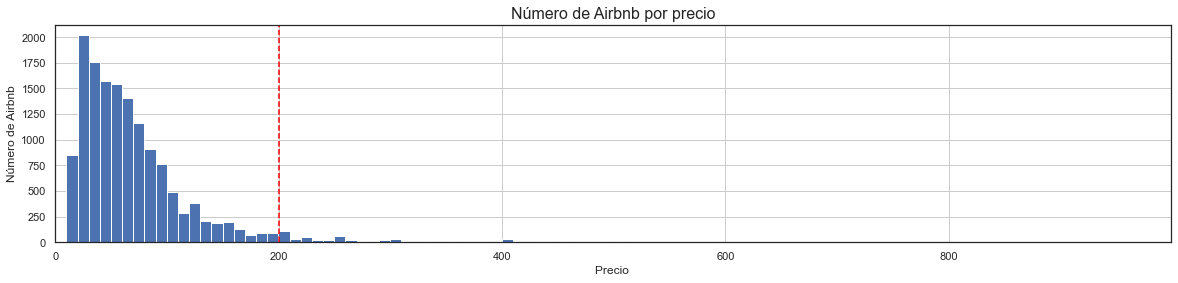

In [137]:
plt.figure(figsize=(20,4))
y.hist(bins=100, range=(0,max(y)))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Número de Airbnb por precio", fontsize=16)
plt.xlabel("Precio ")
plt.ylabel("Número de Airbnb")
plt.show()

No parece ser un factor muy importante, aunque sí crece poco a poco. el Dato de las 33 es algo completamente aleatorio, es posible que solo haya un dato con 33 'Amenities'